# TP n°1 du module 6 : Les algorithmes de classification pour le _Machine Learning_

Dans ce TP, nous allons mettre en pratique les principes de l'apprentissage supervisé.

## Objectifs :
- Savoir mettre en place les principaux algorithmes de classification
- Etudier l'impact de leurs paramètres sur leurs performances
- Comparer les performances de différents algorithmes

In [16]:
# Ajoutez ici les imports de librairies nécessaires
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor

## Question n°0
Commencez par charger à nouveau le jeu de données Titanic, à partir du csv généré dans le TP1 du module 4.
- Préparez les données d'entraînement et de test qui seront utilisées par la suite.

In [9]:
# Lambda nommée pour afficher un score en pourcentage avec un libellé (avec détail) :
pscore = lambda lib, score, detail='': print(F"{lib}{('',f" ({detail})")[len(str(detail))>0]} : {100*score:.2f}%")

titanic = pd.read_csv("Titanic.csv")

x = titanic.drop(['Survived'], axis=1)
y = titanic['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

## Partie 1 : découvrir Naive Bayes

### Question n°1
Commencez par créer un modèle basé sur Naive Bayes, sans changer les paramètres par défaut, en supposant que la répartition des données correspond à une Gaussienne (loi normale).
- Entraînez-le et testez-le.
- Quelle score (accuracy) obtenez-vous ?
- Que pouvez-vous dire de la précision et du rappel ?
- Comparez avec les scores obtenus sur les arbres de décision au module 5
- Avez-vous des hypothèses pour expliquer cette différence ?

In [33]:
#Creation modele
gnb = GaussianNB()

#Entrainement
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)

#Test
print("Accuracy:", gnb.score(x_test, y_test))
print("Precision:", precision_score(y_test, y_pred))
print("Rappel : ", recall_score(y_test, y_pred))

Accuracy: 0.7094972067039106
Precision: 0.6875
Rappel :  0.1896551724137931


#### Observations :
Il y a des correlations entre certaines données contrairement à ce qui est attendu en naive bayes

### Question n°2
Affichez une matrice de corrélation des données du jeu d'entraînement, en y incluant un affichage textuel de la valeur de la corrélation.
- Voyez-vous des informations permettant d'expliquer les performance de l'algorithme _Naive Bayes_ ?

Matrice de Corrélation des Données d'Entraînement (x_train):
            Pclass   Age  Fare  Famille  Sex_male  Embarked_C  Embarked_Q  \
Pclass        1.00 -0.42 -0.55     0.07      0.14       -0.24        0.22   
Age          -0.42  1.00  0.13    -0.27      0.11        0.05       -0.08   
Fare         -0.55  0.13  1.00     0.21     -0.20        0.27       -0.12   
Famille       0.07 -0.27  0.21     1.00     -0.22       -0.04       -0.05   
Sex_male      0.14  0.11 -0.20    -0.22      1.00       -0.11       -0.05   
Embarked_C   -0.24  0.05  0.27    -0.04     -0.11        1.00       -0.15   
Embarked_Q    0.22 -0.08 -0.12    -0.05     -0.05       -0.15        1.00   
Embarked_S    0.08 -0.00 -0.17     0.08      0.14       -0.78       -0.49   
Embarked_U   -0.08  0.08  0.05    -0.03     -0.07       -0.03       -0.02   

            Embarked_S  Embarked_U  
Pclass            0.08       -0.08  
Age              -0.00        0.08  
Fare             -0.17        0.05  
Famille           0.

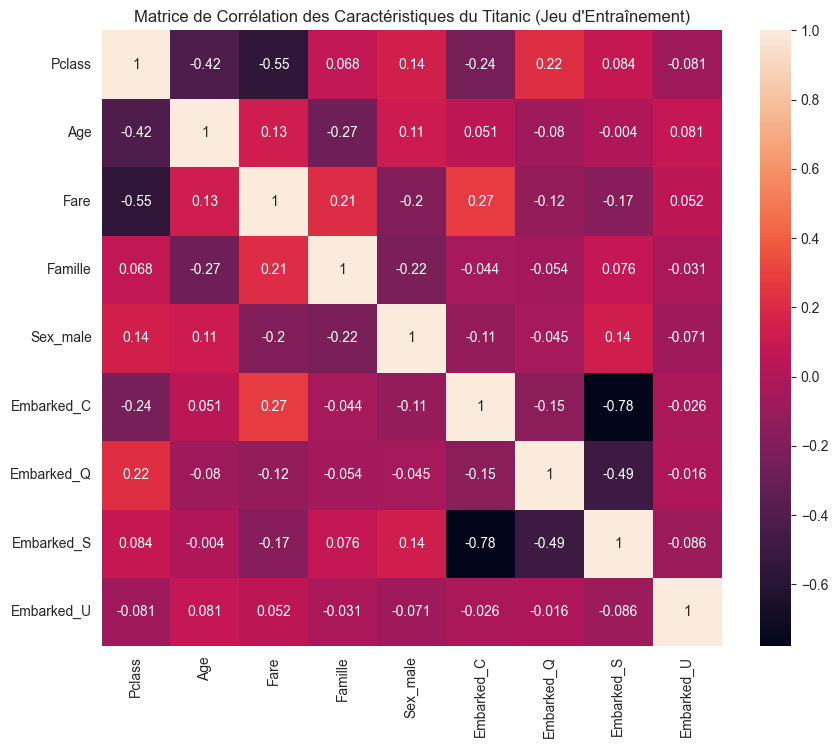

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# x_train est le DataFrame contenant les données d'entraînement numériques et encodées

# 1. Calcul de la matrice de corrélation
correlation_matrix = x_train.corr()

# 2. Affichage textuel de la matrice (pour voir les valeurs précises)
print("Matrice de Corrélation des Données d'Entraînement (x_train):")
print(correlation_matrix.round(2)) # Arrondi à 2 décimales pour la clarté

# 3. Visualisation graphique (Heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True
)
plt.title('Matrice de Corrélation des Caractéristiques du Titanic (Jeu d\'Entraînement)')
plt.show()

#### Observations :
il y a de fortes correlations expliquant que la precisison est plus faible

### Question n°3
Proposez une représentation graphique des attributs continus, permettant de vérifier l'hypothèse que nous avons faite, selon laquelle ces données suivent une loi normale (Gaussienne).

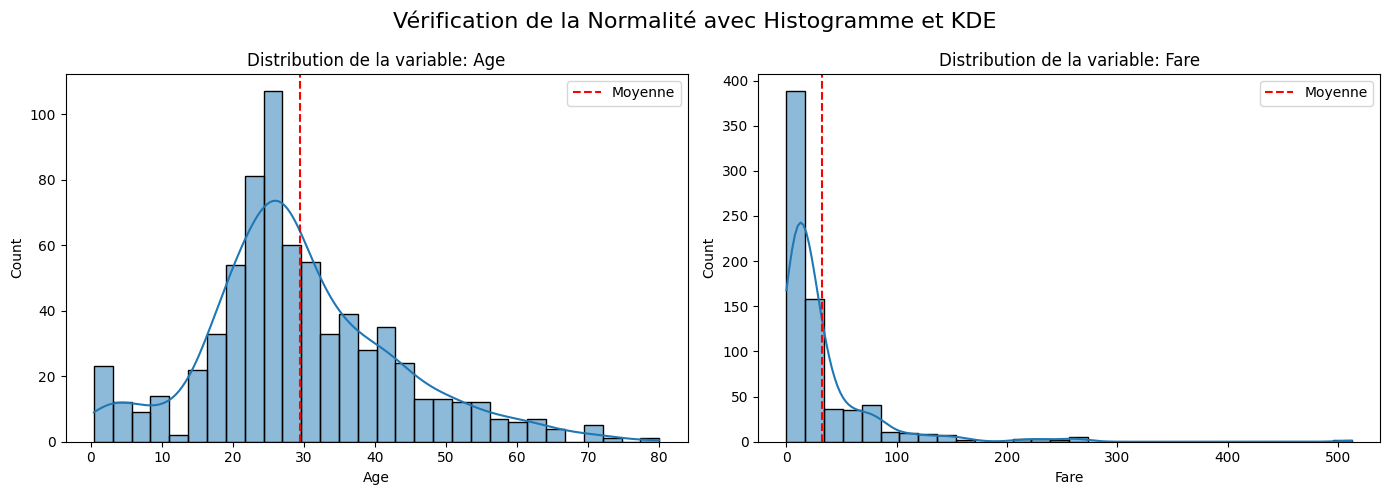

In [11]:


# Identification des colonnes continues (à adapter si votre prétraitement a ajouté des colonnes)
colonnes_continues = ['Age', 'Fare']

# Création des graphiques
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Vérification de la Normalité avec Histogramme et KDE', fontsize=16)

for i, col in enumerate(colonnes_continues):
    sns.histplot(x_train[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Distribution de la variable: {col}')
    axes[i].axvline(x_train[col].mean(), color='red', linestyle='--', label='Moyenne')
    axes[i].legend()

plt.tight_layout()
plt.show()

Le Q-Q Plot (Quantile-Quantile Plot)
Le Q-Q Plot est la méthode graphique la plus rigoureuse pour évaluer la normalité. Il compare les quantiles de votre distribution aux quantiles théoriques d'une loi normale standard.

Si les points s'alignent parfaitement sur la ligne droite diagonale, alors la variable suit une loi normale.

Si les points s'éloignent de la ligne droite (surtout aux extrémités/queues), l'hypothèse de normalité est violée.

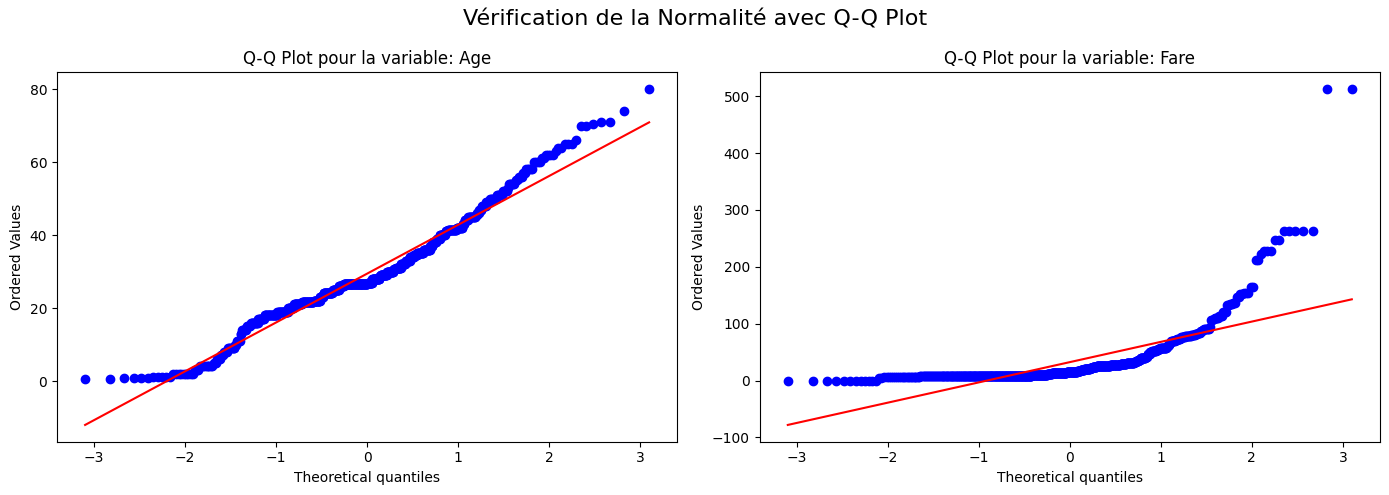

In [14]:
from scipy import stats

# Création des graphiques
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Vérification de la Normalité avec Q-Q Plot', fontsize=16)

for i, col in enumerate(colonnes_continues):
    # Génération du Q-Q Plot
    stats.probplot(x_train[col], dist="norm", plot=axes[i])
    axes[i].set_title(f'Q-Q Plot pour la variable: {col}')

plt.tight_layout()
plt.show()

#### Observations :
Si Fare est fortement non-normal, l'estimation des probabilités par GaussianNB pour cette variable est moins précise. Pour améliorer le modèle, une étape supplémentaire de transformation de la variable (par exemple, application d'un logarithme sur Fare) serait nécessaire pour la rendre plus proche d'une distribution normale.

## Partie 2 : découvrir KNN

### Question n°1
Commencez par créer un modèle KNN, en gardant le nombre de voisins par défaut (à regarder dans la documentation).
- Que pouvez-vous dire de l'accuracy, de la précision et du rappel ?

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Création et Entraînement du modèle (k=5 par défaut)
kmn = KNeighborsClassifier()
kmn.fit(x_train, y_train)

# Prédiction sur l'ensemble de test (étape nécessaire pour les métriques)
y_pred = kmn.predict(x_test)

# Affichage de l'Accuracy
accuracy = kmn.score(x_test, y_test)
print("Accuracy : ", kmn.score(x_test, y_test))
print("Precision : ", precision_score(y_test, y_pred))
print("Rappel : ", recall_score(y_test, y_pred))



# Affichage complet du Rapport de Classification
print("\n--- Rapport de Classification ---")
# Le target_names permet de nommer les classes 0 (Décédé) et 1 (Survivant)
print(classification_report(y_test, y_pred, target_names=['Décédé (0)', 'Survivant (1)']))

Accuracy: 0.7374

--- Rapport de Classification ---
               precision    recall  f1-score   support

   Décédé (0)       0.81      0.79      0.80       121
Survivant (1)       0.59      0.62      0.61        58

     accuracy                           0.74       179
    macro avg       0.70      0.71      0.70       179
 weighted avg       0.74      0.74      0.74       179



#### Observations :
`à compléter`

### Question n°2
Nous allons maintenant observer l'impact du nombre de voisins à prendre en considération.
- Faite varier k entre 1 et 20.
- Calculez à chaque fois accuracy, précision, et rappel.
- Tracez l'évolution de ces trois scores en fonction de k, sur un même graphique.
- Que constatez-vous ?
- Affichez la valeur de k pour laquelle l'accuracy est la plus élevée.

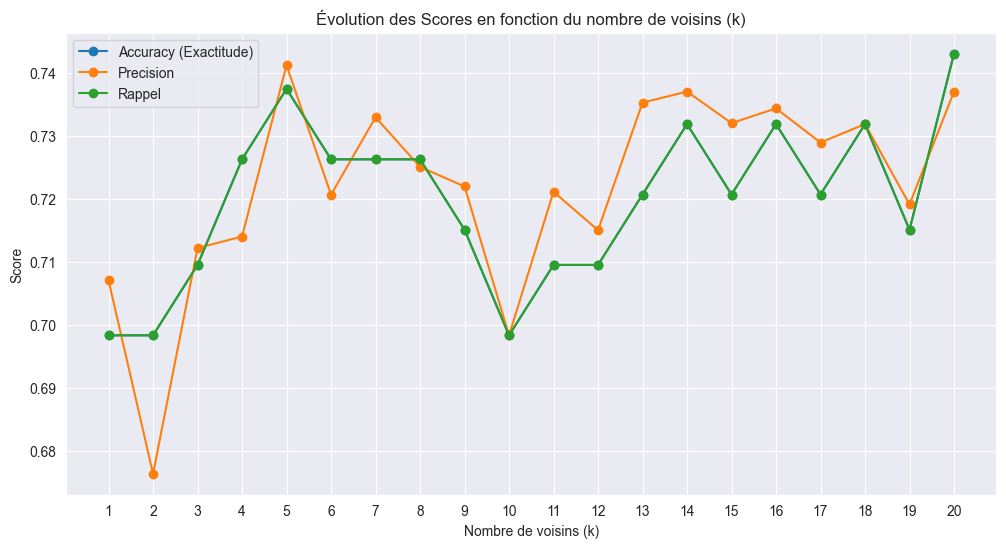

In [24]:
accuracy=[]
precision=[]
recall=[]

for i in range (1,21):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred, average='weighted'))
    recall.append(recall_score(y_test, y_pred, average='weighted'))

# --- Affichage du graphique ---
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), accuracy, label='Accuracy (Exactitude)', marker='o')
plt.plot(range(1, 21), precision, label='Precision', marker='o')
plt.plot(range(1, 21), recall, label='Rappel', marker='o')

plt.title('Évolution des Scores en fonction du nombre de voisins (k)')
plt.xlabel('Nombre de voisins (k)')
plt.ylabel('Score')
plt.xticks(range(1, 21))
plt.legend()
plt.grid(True)
plt.show()


#### Observations :
k=5 est la valeur optimal

### Question n°3
En prenant la valeur de _k_ qui vous semble la plus pertinente, faite varier la dimension (p) utilisée pour calculer la distance de Minkowski entre 2 données.
- Cette distance a-t'elle un fort impact sur les résultats d'accuracy obtenus ?
- Montrez-le en montrant l'évolution de ce score en fonction de _p_<br/> (faire varier entre 1 et 10).
- Ajoutez également la précision et le rappel.

ValueError: x and y must have same first dimension, but have shapes (20,) and (10,)

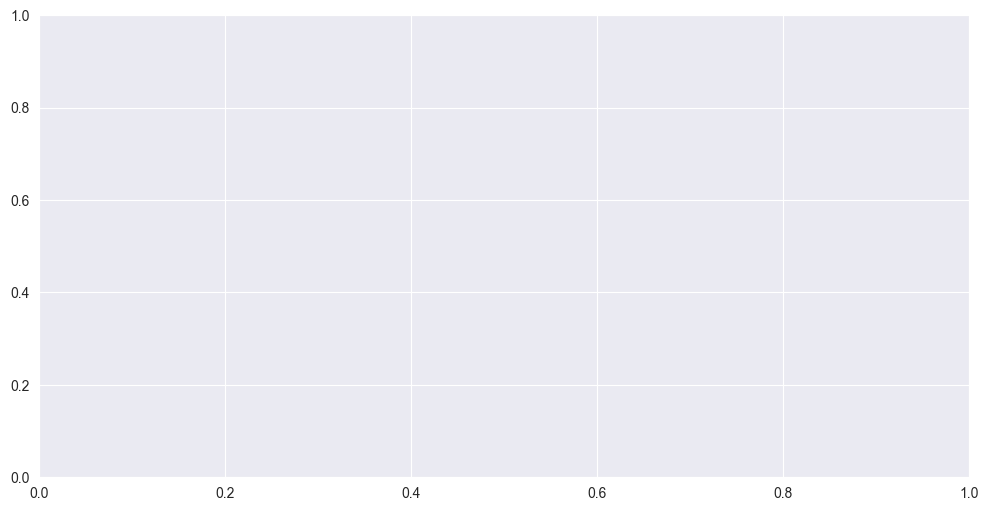

In [25]:
accuracy=[]
precision=[]
recall=[]

for i in range (1,11):
    model = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=i)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred, average='weighted'))
    recall.append(recall_score(y_test, y_pred, average='weighted'))

# --- Affichage du graphique ---
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), accuracy, label='Accuracy (Exactitude)', marker='o')
plt.plot(range(1, 21), precision, label='Precision', marker='o')
plt.plot(range(1, 21), recall, label='Rappel', marker='o')

plt.title('Évolution des Scores en fonction du nombre de voisins (k)')
plt.xlabel('Nombre de voisins (k)')
plt.ylabel('Score')
plt.xticks(range(1, 21))
plt.legend()
plt.grid(True)
plt.show()

#### Observations :
`à compléter`

## Partie 3 : découvrir les SVM

### Question n°1
Créez un modèle de classification basée sur les machines à vecteur de support.
- Dans un premier temps, gardez les options par défaut.
- Que pouvez-vous dire des performances obtenues (accuracy, précision, rappel) ?

In [27]:
#TODO

#### Observations :
`à compléter`

### Question n°2
Testez les différents noyaux disponibles pour l'algorithme SVM (linéaire, polynomial, rbf et sigmoïde).
- Représentez graphiquement l'accuracy, la précision et le rappel, pour chaque noyau.
- Il y en a t'il un qui semble plus pertinent que les autres ?
- Affichez-le, ainsi que les scores obtenus pour ce noyau.

In [30]:
#TODO

### Question n°3
Nous allons essayer d'améliorer les performances obtenues avec le noyau polynomial.
- Utilisez ce noyau (`poly`), et faites varier le degré du polynôme utilisé de 1 à 10.
- Représentez graphiquement l'accuracy, la précision et le rappel, en fonction du degré du polynôme.
- Il y en a-t-il un qui semble plus pertinent que les autres ?
- Affichez-le, ainsi que les scores obtenus pour cette valeur.
- Comparez avec le meilleur score obtenu à la question précédente.

In [32]:
#TODO

## Partie 4 : découvrir les réseaux de neurones (ANN)

### Question n°1
Commençons par étudier le réseau le plus simple : un _perceptron_.
- À l'aide de la classe `sklearn.linear_model.Perceptron`,<br/> créez un perceptron, en gardant les options par défaut.
- Affichez `accuracy`, `précision` et `rappel` : Que pensez-vous de ces performances ?

In [35]:
#TODO

#### Observation :
`à compléter`

### Question n°2
Regardez la documentation pour créer un réseau de neurones (`sklearn.neural_network.MLPClassifier`) :
- Quelle est la structure d'un réseau de neurones par défaut avec scikit-learn ?
- Combien de couches cachées ?
- Combien de neurones par couche ?

_N.B. : Un message d'alerte (⚠Warning: Stochastic Optimizer: Maximum iterations) est suceptible d'apparaître._

#### Réponse :
`à compléter`

### Question n°3
- Créer un réseau de neurones, en gardant ces options par défaut.
- Affichez `accuracy`, `précision` et `rappel` :
    - Que pensez-vous de ces performances, notamment en comparant par rapport au perceptron ?
    - Avez-vous un message d'alerte ?<br/>(⚠Warning: Stochastic Optimizer: Maximum iterations)

In [40]:
#TODO

#### Observation :
`à compléter`

### Question n°4
Si vous avez observé un message d'alerte sur la question précédent :
- Que signifie-t'il selon vous ?
- Que pouvez-vous faire pour y remédier ?
- Proposez un code permettant d'obtenir des résultats, sans message d'alerte.
- Qu'observez-vous sur l'évolution des scores ?

In [43]:
#TODO

#### Observation :
`à compléter`

### Question n°5
Nous allons à présent comparer différentes architectures du réseau de neurones :
- 3 couches de 50 neurones chacune
- 5 couches de 50 neurones chacune
- 3 couches :
    1. 50 neurones,
    2. 100 neurones,
    3. 50 neurones
- 5 couches :
    1. 50 neurones,
    2. 100 neurones,
    3. 50 neurones,
    4. 100 neurones,
    5. 50 neurones

**Les attendus :**
- Représentez graphiquement l'_accuracy_, la _précision_ et le _rappel_, pour chaque architecture.
- Il y en a t'il une qui semble plus pertinente que les autres ?
- Affichez-la, ainsi que les scores obtenus pour cette architecture.
- Comparez avec le score obtenu par l'architecture par défaut.
- Votre code ne doit générer aucun message d'alerte.

In [46]:
#TODO

### Question n°6
En utilisant l'architecture qui vous donnait les meilleures performances, étudier l'impact de la fonction d'activation utilisée sur les performances.
- Représentez sur un graphiques les scores (accuracy, précision et rappel) obtenus pour les quatres fonctions d'activation proposées par _Scikit-Learn_.
- Affichez la fonction qui vous parait la plus pertinente, ainsi que les scores associés.

In [48]:
#TODO

## Partie 5 : comparer les performances des différents algorithmes

Nous allons à présent résumer les différentes performances des algorithmes que vous avez testé dans ce TP :
- Récupérez les meilleurs scores (accuracy) obtenu pour chaque algorithme.
- Représentez-les sur un diagramme en barres, en regroupant par algorithme, et en représentant chaque score par une couleur.
- Un algorithme semble-t'il obtenir de meilleures performances que les autres ?

In [50]:
#TODO

## Partie 6 : optimiser la recherche des paramètres optimaux

Dans ce TP, nous avons souvent cherché à identifier la meilleur combinaison de paramètres. Nous avons procédé par itération, en cherchant à fixer un paramètre avant de faire évoluer les autres. Cette méthode est coûteuse, et pour faire une recherche exhaustive, nécessite, de répéter très souvent le même code. Scikit-learn propose une classe, `sklearn.model_selection.GridSearchCV`, qui va permettre d'optimiser cette recherche de paramétrage optimal.

_Lien vers la documentation :_ [sklearn.model_selection.GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

Le principe est de définir un dictionnaire, où la clé correspond à un paramètre, et la valeur à la liste de valeurs possibles à tester pour le paramètre considéré. 

### Consigne :
Appliquez ce principe pour déterminer la meilleure combinaison possible pour le réseau de neurones, en repartant des différentes configurations testées dans les parties précédentes.

In [53]:
#TODO

In [54]:
#TODO

# Fin du TP !